### Exploring Relationships

In [1]:
#Import pandas
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
type(brfss)

pandas.core.frame.DataFrame

A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right.

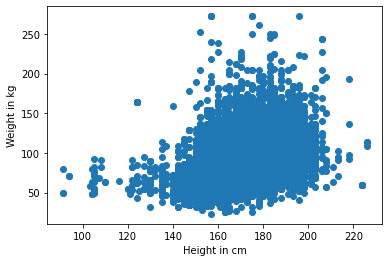

In [2]:
height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so we can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. 

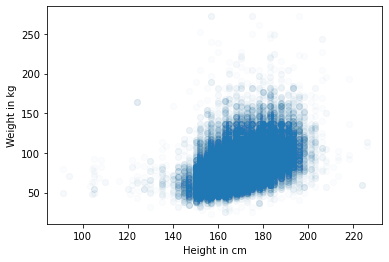

In [3]:
plt.plot(height, weight, 'o', alpha = 0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. 

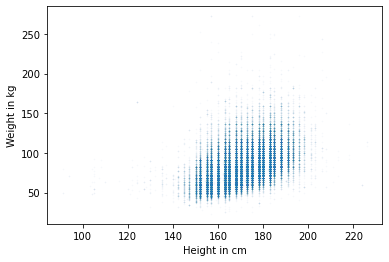

In [4]:
plt.plot(height, weight, 'o', alpha = 0.02, markersize = 1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

Adding random noise like this is called "jittering". 

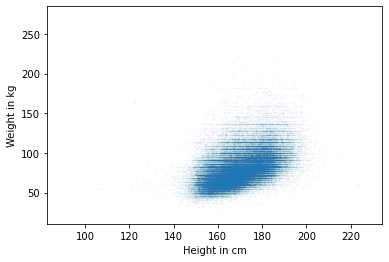

In [5]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight, 'o', alpha = 0.02, markersize = 1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

We added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

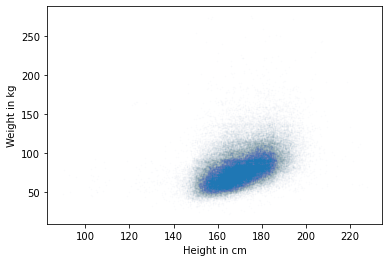

In [6]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.01, markersize = 1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

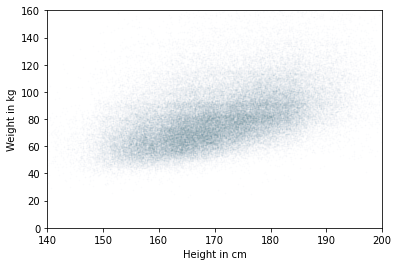

In [7]:
#Zooming
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.01, markersize = 1)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Finally, we have a reliable picture of the relationship between height and weight.

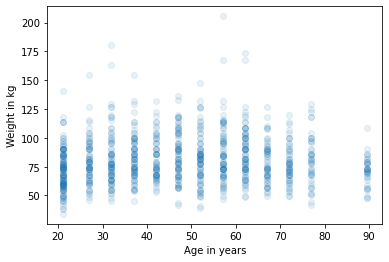

In [8]:
##Example
# Select the first 1000 respondents
brfss_1 = brfss[:1000]

# Extract age and weight
age = brfss_1['AGE']
weight = brfss_1['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

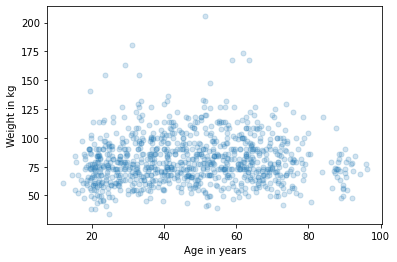

In [9]:
##Example
# Select the first 1000 respondents
brfss_1 = brfss[:1000]

# Add jittering to age
age = brfss_1['AGE'] + np.random.normal(0, 2.5, size = len(brfss[:1000]))
# Extract weight
weight = brfss_1['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha = 0.2, markersize = 5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

##################################################################

### Visualizing Relationships

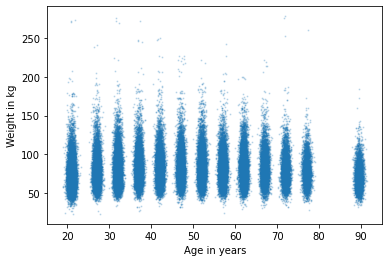

In [10]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size = len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size = len(brfss))

# Make a scatter plot
plt.plot(age, weight, 'o', alpha = 0.2, markersize = 1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

The space between the columns makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it. The name for this plot is Violin Plot.

#### Violin Plot

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

To use seaborn for plotting violin plot, we should make sure that there are no null values in the dataframe.

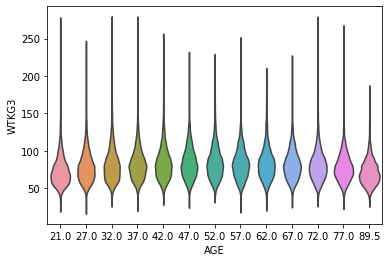

In [11]:
data = brfss.dropna(subset = ['AGE', 'WTKG3'])
sns.violinplot(x = 'AGE', y = 'WTKG3', data = data, inner = None)
plt.show()

Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. 

There's one other way to look at data like this, called a box plot.

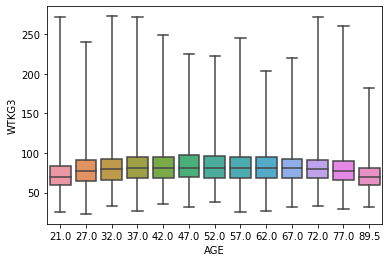

In [12]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)
plt.show()

These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale(). Here's what it looks like

#### Log Scale

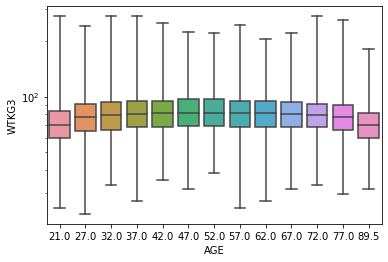

In [13]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)
plt.yscale('log')
plt.show()

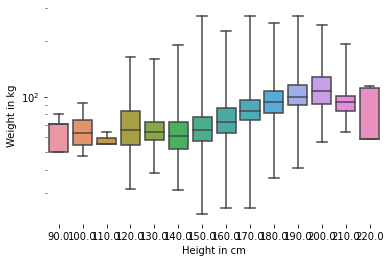

In [14]:
##Example
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


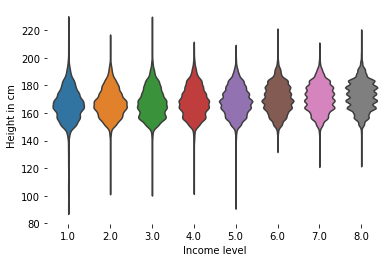

In [15]:
##Example
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4', data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


####################################################################

### Correlation

Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables.

In [16]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

In [17]:
subset.head()

,HTM4,WTKG3,AGE
96230,160.0,60.33,47.0
244920,163.0,58.97,89.5
57312,163.0,72.57,42.0
32573,165.0,74.84,32.0
355929,170.0,108.86,32.0


we can use the corr() method, like this:

In [18]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. The next entry is more interesting; the correlation of height and weight is about 0.47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. The correlation between height and age is about -0.09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

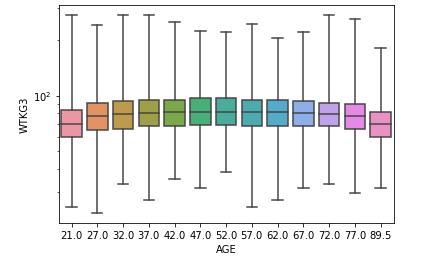

The above plot shows the relationship between age and weight. We can see that the relationship is definnitely not linear & correlation only works for linear relationships. Hence, the correlation is less.

Let's generate some random values:

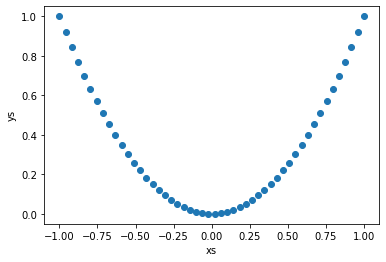

In [19]:
xs = np.linspace(-1, 1)
ys = xs**2
plt.scatter(xs, ys)
plt.xlabel('xs')
plt.ylabel('ys')
plt.show()

The relationship here is a very strong relationship as we can make strong guess of ys when xs is given.\
Now, let's calculate correlation between xs and ys. 

In [20]:
np.corrcoef(xs, ys)

array([[ 1.00000000e+00, -4.86224456e-17],
       [-4.86224456e-17,  1.00000000e+00]])

The correlation is close to zero.\
If correlation is equal to 1, then there is a strong linear relationship between the variables and when correlation is zero, it means that there is no linear relationship between two variables at all but it doesnot mean that there cannot be non-linear relationships.

Another thing is that the correlation doesnot provide the slope. By correlation, we mean how much we can predict one variable using another on a scale of 0-1.

In [21]:
##Example
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


########################################################################

### Simple Regression

Correlation does not always measure what we really want to know. So, we look at an alternative - simple linear regression.

To estimate the slope of the line, we can use linregress() from the SciPy stats module. 

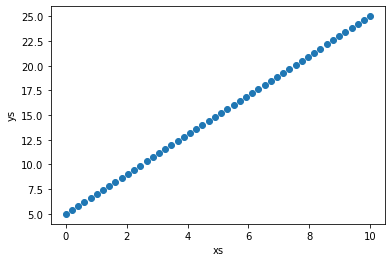

In [22]:
xs = np.linspace(0, 10)
ys = xs*2+5
plt.scatter(xs, ys)
plt.xlabel('xs')
plt.ylabel('ys')
plt.show()

In [23]:
from scipy.stats import linregress


res = linregress(xs, ys)

In [24]:
print(res)

LinregressResult(slope=2.0, intercept=5.000000000000002, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


The result is a LinRegressResult object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept.

In [25]:
#Let's look at a real example
subset = brfss.dropna(subset = ['WTKG3', 'HTM4'])

xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

#Zooming
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.01, markersize = 1)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

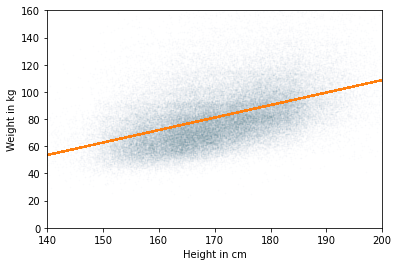

In [26]:
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.01, markersize = 1)
plt.axis([140, 200, 0, 160])
fx = height_jitter
fy = res.intercept + res.slope * height_jitter
plt.plot(fx, fy, '-')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

In [27]:
##Example
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
